# Peer-graded Assignment Week 1: Capstone Project

# The Battle of Neighborhoods in Lyon, France

**Table of contents**

1. Introduction - Business Problem Description
2. Data
3. Methotology
4. Creating a dataframe, a table and bar graph of selected districts 
5. Creating a map of Lyon and spotting selected districts on the map
6. Testing Foursquare service in one district in Lyon
7. Exploring selected districts and their venues in Lyon
8. Analyzing each district by district
9. Clustering the districts
10. Examining clusters and giving them names
11. Identifying and counting competing venues
12. Results of the analysis

## 1. Introduction - Business Problem Description
The analysis is part of a study for a nordic coffeehouse chain that plans to establish new franchises in Lyon. Lyon is a vibrant city in Southern France with 0,8% yearly population growth rate.  The detailed study names districts that could be optimal places to establish new coffee shops in Lyon. The Foursquare is an excellent location data and technology platform to study different options for locations. Next I will describe a business concept, requirements and assumptions for profitable business. Only districts that meet these requirements can be selected for potential locations for coffeeshops.

The business concept
The coffee shops infuse warm and cold drinks prepared from nordic berries, vegetarian light cuisine such as pastries, sandwiches and light snacks served on nordic design cutlery. The design table-ware is presented in coffee shops. Customers can purchase nordic tableware such as cups, mugs, jugs, serving dish, bowls and serving dishes in online store.

Requirements and business assumptions
It is very essential that franchise entrepreneurs can make profitable business preferable already during the first year. Consequently, the business concept owner helps to locate potential districts and give transparent metrics and assumption for profitable business. Here I describe three essential areas:
* Sales assumptions
* Location selection criteria
* Customer profiles

Sales assumptions: 
The space for customer area is planned to be ca. 150m2 in coffeehouses. If each customer needs space of 3 m2,  coffeehouses can serve same time 50 people. With 6 table rounds, the coffeehouse can serve 300 customers daily. In case 10% of local people find the coffeeshop daily to their place to visit, the district should have 3000 potential local customers. 
Transit hubs such as train and tram stations are expected to bring occasional customers. 
Traditional coffeehouse products are expected to bring sales of 1800 euros and tableware online sale 1200 euros daily. Consequently, the total daily revenue were 3000 euros daily. The coffeeshop should be profitable also outside tourist seasons.

Location selection criteria: 
Public transportation hubs and near pedestrian streets have been found good places to establish a new coffee shop. On pedestrian streets people often seek out to window shop and find what they’re craving in the moment. The location should have several complimentary cafes and restaurants, multiple eating options, but not a one that has the same business concept. Complimentary venues are other restaurants, cafés, steakhouses, breakfast venues,  noodle shops, bistros, burger and taco restaurants. However, very high number of cafes and restaurants may lead to fierce competition and bad service level what drives away customers and depletes good coffee shop culture in the area. 

Customer profiles: 
The most potential customers are in their 30-45 years, median income, single and married women who value relax social ambiance and something extra in service. Their coffee shop visits are often connected to another activity like shopping or training in sport centres. They are often willing to change their basic kitchen table-wares to design cutlery. They rely on friends’ recommendations.

## 2. Data
Data is acquired to test if the district meets the following  criteria:
* Growth rate of residents is increasing (presented in a blog article)
* Number of female potential customers in the age of  30-45 years is substantial - 20% of all women residents (presented in a blog article)
* number of customers divided by the number of total number of complimentary restaurants is minimum 3000 (presented here)
* Local venues build an optimal profile with transit hub and attractive complimentary services (presented here)

The primary date source to test first two criteria is the website 'Map-of-France’. 'Map-of-France’ has data sets such as historical data of the population, population distribution by sex, births and deaths, distribution of the population by age and women population distribution by age. The World of Population Review data sets will be used as an additional data source to get new data and check demographical data from other data sources. In addition, the National Institute of Statistics and Economic Studies collects, analyses and disseminates information on the French economy and society.

The Foursquare location data and technology is used to test two last criteria. Foursquare provides excellent data that enables us to explore and cluster venues in districts of the city of Lyon.

## 3. Methotology
The methodology section describes sep by step how the analysis is conducted. 

First, we check if demographic data meets the criteria by comparing the assumption and statistical facts presented in selected data sources. 

Second, city of Lyon is divided in 22 districts and population data per district is collected. The districts are Lyon 1 - Place des Terreaux, Lyon 2 - Place Bellecour, Lyon 3 - La Part-Dieu, Lyon 4 - Croix-Rousse, Lyon 5 - Old Lyon, Lyon 6 - Parc de la Tete dOr’, Lyon 7 - Rhone, Lyon 8 - Cinema, Lyon 9 - Vaise, Tassin-la-Demi-Lune, La Mulatière, Villeurbanne, Caluire-et-Cuire, Sainte-Foy-lès-Lyon, Saint-Cyr-au-Mont-dOr, Écully’, Oullins, Saint-Fons, Vaulx-en-Velin, Bron, Meyzieu and Rillieux-la-Pape.

Third, all districts are located by using latitude and longitude values and a map is produced.

Forth, Foursquare service is used to retrieve data of venues within a radius of 500 meters in district center. The data element ’Venue category’ is used to to identify complimentary restaurants and their number of occurrence

Fifth, ten the most common venue categories per a district is identified and sorted.

Sixth, K-Means method is used to cluster district in 8 categories. The categories are labelled to describe the characteristics of the district.

Finally, the results are presented in a table and a map with clustering labels is printed.

## 4. Creating a dataframe, a table and bar graph of selected districts

First we import all necessary libraries.

In [1]:
# sudo easy_install pip
# numpy and pandas libraries
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)

# import Matplotlib and associated plotting modules
# we are using the inline backend
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
mpl.style.use(['ggplot']) # optional: for ggplot-like style

# import folium map rendering library
!pip -q install folium
import folium

# import library to handle requests
import requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# import geopy to convert an address into latitude and longitude values
!pip -q install geopy
from geopy.geocoders import Nominatim

# import k-means from clustering stage
from sklearn.cluster import KMeans

print('Libraries imported')

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Libraries imported


In [2]:
# Creating a dataframe
loc = pd.DataFrame([['Lyon 01 Place des Terreaux', 45.767,4.834,28126],
['Lyon 04 Croix-Rousse',45.7751,4.8271,34496],
['Lyon 06 Parc de la Tete dOr',45.7679,4.8506,49683],
['Lyon 03 La Part-Dieu',45.7612,4.8518,90490],
['Lyon 02 Place Bellecour',45.7542,4.8309,29875],
['Lyon 09 Vaise',45.7726,4.8033,47113],
['Lyon 07 Rhone',45.7452,4.842,69232],
['Lyon 08 Cinema',45.7363,4.8687,76303],
['Lyon 05 Old Lyon',45.7611,4.8268,47012],
['Tassin-la-Demi-Lune',45.7667,4.7833,18278],
['La Mulatière',45.7333,4.8000,6540],
['Villeurbanne',45.7667,4.8833,138151],
['Caluire-et-Cuire',45.8,4.85,41010],
['Sainte-Foy-lès-Lyon',45.7333,4.8000,22151],
['Saint-Cyr-au-Mont-dOr',45.8,4.8167,5385],
['Écully',45.7667,4.7667,17959],
['Oullins',45.7167,4.8000,25605],
['Saint-Fons',45.7000,4.8667,16964],
['Vaulx-en-Velin',45.7833,4.9333,40626],
['Bron',45.7333,4.9167,38833],
['Meyzieu',45.766,5.0000,29014],
['Rillieux-la-Pape',45.824,4.896,29546]], columns=('District', 'Latitude', 'Longitude', 'Population'))
loc.set_index('District', inplace=True)
# Creating a table
loc

,Latitude,Longitude,Population
District,,,
Lyon 01 Place des Terreaux,45.767,4.834,28126
Lyon 04 Croix-Rousse,45.775,4.827,34496
Lyon 06 Parc de la Tete dOr,45.768,4.851,49683
Lyon 03 La Part-Dieu,45.761,4.852,90490
Lyon 02 Place Bellecour,45.754,4.831,29875
Lyon 09 Vaise,45.773,4.803,47113
Lyon 07 Rhone,45.745,4.842,69232
Lyon 08 Cinema,45.736,4.869,76303
Lyon 05 Old Lyon,45.761,4.827,47012


Here we check the shape of our dataframe.

In [3]:
loc.shape
# loc['Population']

(22, 3)

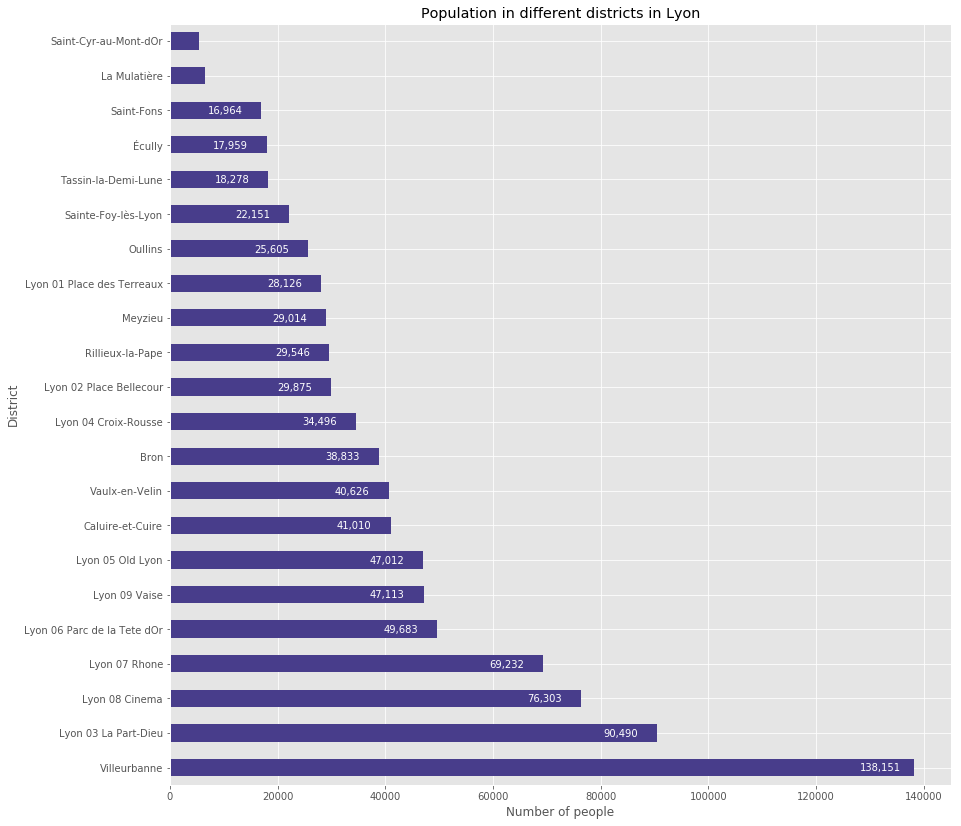

In [4]:
# Creating a bar graph of selected districts 
loc.sort_values(by='Population', ascending=False, axis=0, inplace=True)
loc['Population'].plot(kind='barh', figsize=(14, 14), color='darkslateblue')
plt.title('Population in different districts in Lyon')
plt.ylabel('District')
plt.xlabel('Number of people')
for index, value in enumerate(loc['Population']): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 10000, index - 0.10), color='white')
plt.show()

## 5. Creating a map of Lyon and spotting selected districts on the map

Here we inquire the latitude and longitude values of Lyon

In [5]:
address = 'Lyon, France'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Lyon are {}, {}.'.format(latitude, longitude))
# The latitude and longitude of Lyon are 45.76 degrees North and 4.835 degrees East

The geograpical coordinate of Lyon are 45.7578137, 4.8320114.


## Presenting the map of Lyon

We create a map of Lyon with neighborhoods superimposed on top.

In [6]:
# loc.reset_index() # why reset_index() do not work
# loc[["Latitude", "Longitude", "Population"]]
loc.reset_index(inplace = True)
# loc

In [7]:
# create map of Lyon using latitude and longitude values

# loc.reset_index()
map_lyon = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, district, population in zip(loc['Latitude'], loc['Longitude'], loc['District'], loc['Population']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_lyon)  
map_lyon

# 6. Testing Foursquare service in one district in Lyon

Here we define Foursquare Credentials and Version

In [8]:
CLIENT_ID = '0FCBIGWFDP2POC2XD0N42WNDORURPZH1WOT035YW3RZPKMMI' # your Foursquare ID
CLIENT_SECRET = 'NM1SU41QBCKUMK0L2U3H2PTHADXSRSWYD04C231ZMHGN4YJB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 0FCBIGWFDP2POC2XD0N42WNDORURPZH1WOT035YW3RZPKMMI
CLIENT_SECRET:NM1SU41QBCKUMK0L2U3H2PTHADXSRSWYD04C231ZMHGN4YJB


Let's explore the first neighborhood in our dataframe

In [9]:
loc.loc[0, 'District'] # one arbitary neighborhood's name

'Villeurbanne'

We will get the neighborhood's latitude and longitude values.

In [10]:
neighborhood_latitude = loc.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = loc.loc[0, 'Longitude'] # neighborhood longitude value
neighborhood_population = loc.loc[0, 'Population'] # neighborhood longitude value
neighborhood_name = loc.loc[0, 'District'] # neighborhood name

print('Latitude and longitude values of {} are {}, {} and population is {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude, neighborhood_population))

Latitude and longitude values of Villeurbanne are 45.7667, 4.8833 and population is 138151.


Now, let's get the top 100 venues that are in Lyon within a radius of 1000 meters

In [11]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=0FCBIGWFDP2POC2XD0N42WNDORURPZH1WOT035YW3RZPKMMI&client_secret=NM1SU41QBCKUMK0L2U3H2PTHADXSRSWYD04C231ZMHGN4YJB&v=20180605&ll=45.7667,4.8833&radius=500&limit=100'

Here we send the GET request and examine the resutls

In [12]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e80d463ad1ab4001bd6bfdd'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Villeurbanne',
  'headerFullLocation': 'Villeurbanne, Lyon',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 11,
  'suggestedBounds': {'ne': {'lat': 45.7712000045, 'lng': 4.889738819711924},
   'sw': {'lat': 45.7621999955, 'lng': 4.876861180288077}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '55049514498e150bef8d7d58',
       'name': 'Bieristan',
       'location': {'address': '14 rue Paul Lafargue',
        'lat': 45.767922852924464,
        'lng': 4.883442073310742,
        'labeledLatLngs': [{'label': 'display',
          'lat': 45.76792285292446

Now we can borrow the get_category_type function from the Foursquare lab

In [13]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a pandas dataframe

In [14]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

,name,categories,lat,lng
0,Bieristan,Beer Bar,45.768,4.883
1,TNP,Comedy Club,45.766,4.880
2,Maison Bettant,Bakery,45.768,4.880
3,Ninkasi Gratte-Ciel,Bar,45.769,4.879
4,Starbucks,Coffee Shop,45.767,4.879
5,Boutique Orange,Electronics Store,45.768,4.880
6,Monoprix,Supermarket,45.770,4.880
7,Subway,Sandwich Place,45.767,4.879
8,Carrefour Market,Supermarket,45.765,4.880
9,McDonald's,Fast Food Restaurant,45.767,4.880


And how many venues were returned by Foursquare?

In [15]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

11 venues were returned by Foursquare.


# 7. Exploring selected districts and their venues in Lyon

Let's create a function to repeat the same process to all the neighborhoods in Lyon.

In [16]:
def getNearbyVenues(names, latitudes, longitudes, radius=600):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Now write the code to run the above function on each neighborhood and create a new dataframe called lyon_venues.

In [17]:
lyon_venues = getNearbyVenues(names=loc['District'],
                                   latitudes=loc['Latitude'],
                                   longitudes=loc['Longitude']
                                  )

Villeurbanne
Lyon 03 La Part-Dieu
Lyon 08 Cinema
Lyon 07 Rhone
Lyon 06 Parc de la Tete dOr
Lyon 09 Vaise
Lyon 05 Old Lyon
Caluire-et-Cuire
Vaulx-en-Velin
Bron
Lyon 04 Croix-Rousse
Lyon 02 Place Bellecour
Rillieux-la-Pape
Meyzieu
Lyon 01 Place des Terreaux
Oullins
Sainte-Foy-lès-Lyon
Tassin-la-Demi-Lune
Écully
Saint-Fons
La Mulatière
Saint-Cyr-au-Mont-dOr


Let's check the size of the resulting dataframe

In [18]:
print(lyon_venues.shape)
lyon_venues.head()

(581, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Villeurbanne,45.767,4.883,Bieristan,45.768,4.883,Beer Bar
1,Villeurbanne,45.767,4.883,TNP,45.766,4.880,Comedy Club
2,Villeurbanne,45.767,4.883,Maison Bettant,45.768,4.880,Bakery
3,Villeurbanne,45.767,4.883,Ninkasi Gratte-Ciel,45.769,4.879,Bar
4,Villeurbanne,45.767,4.883,Starbucks,45.767,4.879,Coffee Shop


Let's check how many unique venues were returned for each neighborhood

In [19]:
# loc.set_index('District', inplace=True)
# loc.head()
# lyon_venues.set_index('Neighborhood', inplace=True)
# lyon_venues.groupby('Neighborhood').count()
lyon_venues.groupby('Neighborhood').nunique()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Bron,1,1,1,5,5,5,4
Caluire-et-Cuire,1,1,1,5,5,5,5
La Mulatière,1,1,1,5,5,5,5
Lyon 01 Place des Terreaux,1,1,1,99,100,100,49
Lyon 02 Place Bellecour,1,1,1,97,99,100,40
Lyon 03 La Part-Dieu,1,1,1,70,74,74,43
Lyon 04 Croix-Rousse,1,1,1,39,39,39,27
Lyon 05 Old Lyon,1,1,1,100,100,100,47
Lyon 06 Parc de la Tete dOr,1,1,1,54,54,54,31


Let's find out how many unique categories can be curated from all the returned venues

In [20]:
print('There are {} uniques categories.'.format(len(lyon_venues['Venue Category'].unique())))

There are 128 uniques categories.


In [21]:
# Print all unique venue groups
lyon_venues['Venue Category'].unique()

array(['Beer Bar', 'Comedy Club', 'Bakery', 'Bar', 'Coffee Shop',
       'Electronics Store', 'Supermarket', 'Sandwich Place',
       'Fast Food Restaurant', 'Concert Hall', 'Market',
       'Seafood Restaurant', 'Gourmet Shop', 'Toy / Game Store', 'Hotel',
       'Creperie', 'French Restaurant', 'Asian Restaurant',
       'Lyonese Bouchon', 'Wine Bar', 'Indian Restaurant',
       'Department Store', 'Japanese Restaurant', 'Plaza', 'Restaurant',
       'Shopping Mall', 'Pizza Place', 'Sporting Goods Shop', 'Diner',
       'Burger Joint', 'Gym / Fitness Center',
       'Modern European Restaurant', 'Belgian Restaurant',
       'Turkish Restaurant', 'Bagel Shop', 'Mobile Phone Shop',
       'Cosmetics Shop', 'Clothing Store', 'Cupcake Shop',
       'Grocery Store', 'Café', 'Bus Stop', 'Vietnamese Restaurant',
       'Food Truck', 'Italian Restaurant', 'Food & Drink Shop', 'Museum',
       'Convenience Store', 'Park', 'Tram Station', 'Resort', 'Tea Room',
       'Indie Movie Theater', 'Bi

## 8. Analyzing each district by district

In [22]:
# one hot encoding
lyon_onehot = pd.get_dummies(lyon_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
# lyon_venues.reset_index(inplace=True)
lyon_onehot['Neighborhood'] = lyon_venues['Neighborhood']
lyon_onehot.head()
# lyon_venues['Neighborhood'].head()

,American Restaurant,Amphitheater,Art Museum,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Garden,Belgian Restaurant,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Bridge,Burger Joint,Bus Stop,Business Service,Café,Chocolate Shop,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Truck,French Restaurant,Fruit & Vegetable Store,Garden Center,Gas Station,Gastropub,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Lebanese Restaurant,Lounge,Lyonese Bouchon,Market,Medical Center,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Multiplex,Museum,Neighborhood,New American Restaurant,Opera House,Optical Shop,Park,Pedestrian Plaza,Perfume Shop,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Resort,Restaurant,Road,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Villeurbanne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Villeurbanne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Villeurbanne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Villeurbanne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Villeurbanne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [23]:
# move neighborhood column to the first column
# list(lyon_onehot.columns[:-1])
fixed_columns = [lyon_onehot.columns[-1]] + list(lyon_onehot.columns[:-1])
lyon_onehot = lyon_onehot[fixed_columns]

In [24]:
print(lyon_onehot.shape)
lyon_onehot.head(6)

(581, 128)


,Wine Shop,American Restaurant,Amphitheater,Art Museum,Asian Restaurant,Bagel Shop,Bakery,Bank,Bar,Beer Bar,Beer Garden,Belgian Restaurant,Bistro,Bookstore,Brazilian Restaurant,Breakfast Spot,Bridge,Burger Joint,Bus Stop,Business Service,Café,Chocolate Shop,Church,City Hall,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Electronics Store,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Fish & Chips Shop,Food & Drink Shop,Food Truck,French Restaurant,Fruit & Vegetable Store,Garden Center,Gas Station,Gastropub,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Lebanese Restaurant,Lounge,Lyonese Bouchon,Market,Medical Center,Metro Station,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Multiplex,Museum,Neighborhood,New American Restaurant,Opera House,Optical Shop,Park,Pedestrian Plaza,Perfume Shop,Pharmacy,Pizza Place,Playground,Plaza,Pool,Pub,Public Art,Resort,Restaurant,Road,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Smoke Shop,Snack Place,Speakeasy,Sporting Goods Shop,Stadium,Steakhouse,Street Art,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Toy / Game Store,Trail,Train Station,Tram Station,Tunnel,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Villeurbanne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Villeurbanne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Villeurbanne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Villeurbanne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Villeurbanne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Villeurbanne,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category.

In [25]:
lyon_grouped = lyon_onehot.groupby('Neighborhood').mean().reset_index() # (inplace=True)
# lyon_grouped = lyon_onehot.groupby('Neighborhood').mean()
# lyon_grouped.index
# https://stackoverflow.com/questions/52330016/pandas-reset-index-after-performing-groupby-and-retain-selective-columns
# https://github.com/dask/dask/issues/2929
# https://stackoverflow.com/questions/22407798/how-to-reset-a-dataframes-indexes-for-all-groups-in-one-step
# https://intellipaat.com/community/3011/pandas-resetindex-after-groupby-valuecounts

Let's confirm the new size.

In [26]:
lyon_grouped.shape

(22, 128)

Let's print each neighborhood along with the top 5 most common venues.

In [27]:
num_top_venues = 5

for hood in lyon_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = lyon_grouped[lyon_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bron----
                       venue      freq
0               Tram Station  400.000m
1                Coffee Shop  200.000m
2                     Bakery  200.000m
3  Middle Eastern Restaurant  200.000m
4                 Playground     0.000


----Caluire-et-Cuire----
                        venue      freq
0               Shopping Mall  200.000m
1  Construction & Landscaping  200.000m
2                       Plaza  200.000m
3                Concert Hall  200.000m
4                 Gas Station  200.000m


----La Mulatière----
           venue      freq
0           Pool  200.000m
1  Jewelry Store  200.000m
2          Hotel  200.000m
3          Diner  200.000m
4           Bank  200.000m


----Lyon 01 Place des Terreaux----
               venue      freq
0  French Restaurant  130.000m
1                Bar  110.000m
2                Pub   50.000m
3              Plaza   40.000m
4        Coffee Shop   40.000m


----Lyon 02 Place Bellecour----
               venue      freq
0  French Res

Let's put that into a pandas dataframe.

First, let's write a function to sort the venues in descending order.

In [28]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [29]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = lyon_grouped['Neighborhood']

for ind in np.arange(lyon_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(lyon_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bron,Tram Station,Middle Eastern Restaurant,Coffee Shop,Bakery,Wine Bar,Falafel Restaurant,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market
1,Caluire-et-Cuire,Shopping Mall,Construction & Landscaping,Concert Hall,Plaza,Gas Station,Donut Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
2,La Mulatière,Hotel,Jewelry Store,Diner,Bank,Pool,Department Store,Dessert Shop,Deli / Bodega,French Restaurant,Donut Shop
3,Lyon 01 Place des Terreaux,French Restaurant,Bar,Pub,Plaza,Coffee Shop,Cocktail Bar,Café,Fast Food Restaurant,Lyonese Bouchon,Burger Joint
4,Lyon 02 Place Bellecour,French Restaurant,Hotel,Plaza,Café,Sandwich Place,Pub,Bakery,Italian Restaurant,Sushi Restaurant,Coffee Shop


##  9. Clustering the neighborhoods

Run k-means to cluster the neighborhood into 6 clusters.

In [30]:
# set number of clusters
kclusters = 8

lyon_grouped_clustering = lyon_grouped.drop('Neighborhood', 1)

# run k-means clustering
# kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(lyon_grouped_clustering)
kmeans = KMeans(init="k-means++", n_clusters=kclusters, random_state=0, n_init=12).fit(lyon_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 4, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [31]:
loc.head()

,District,Latitude,Longitude,Population
0,Villeurbanne,45.767,4.883,138151
1,Lyon 03 La Part-Dieu,45.761,4.852,90490
2,Lyon 08 Cinema,45.736,4.869,76303
3,Lyon 07 Rhone,45.745,4.842,69232
4,Lyon 06 Parc de la Tete dOr,45.768,4.851,49683


In [32]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

In [33]:
lyon_merged = loc

# merge lyon_grouped with lyon_data to add latitude/longitude for each neighborhood
lyon_merged = lyon_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='District')

lyon_merged.head(12) # check the last columns!

,District,Latitude,Longitude,Population,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Villeurbanne,45.767,4.883,138151,1,Supermarket,Bakery,Fast Food Restaurant,Electronics Store,Beer Bar,Coffee Shop,Bar,Comedy Club,Sandwich Place,French Restaurant
1,Lyon 03 La Part-Dieu,45.761,4.852,90490,1,French Restaurant,Japanese Restaurant,Hotel,Supermarket,Fast Food Restaurant,Department Store,Clothing Store,Wine Bar,Cupcake Shop,Mobile Phone Shop
2,Lyon 08 Cinema,45.736,4.869,76303,1,Resort,Grocery Store,Comedy Club,Park,Museum,Food & Drink Shop,French Restaurant,Supermarket,Convenience Store,Tram Station
3,Lyon 07 Rhone,45.745,4.842,69232,1,Restaurant,Japanese Restaurant,Italian Restaurant,Gym,Hotel,Pizza Place,French Restaurant,Tea Room,Café,Smoke Shop
4,Lyon 06 Parc de la Tete dOr,45.768,4.851,49683,1,French Restaurant,Japanese Restaurant,Sushi Restaurant,Bakery,Seafood Restaurant,Café,Coffee Shop,Diner,Supermarket,Plaza
5,Lyon 09 Vaise,45.773,4.803,47113,1,Hotel,Kebab Restaurant,Plaza,Pizza Place,Department Store,Food & Drink Shop,Burger Joint,Metro Station,Supermarket,Pool
6,Lyon 05 Old Lyon,45.761,4.827,47012,1,French Restaurant,Pub,Café,Lyonese Bouchon,Plaza,Bar,Burger Joint,Wine Bar,Historic Site,Hotel
7,Caluire-et-Cuire,45.800,4.850,41010,1,Shopping Mall,Construction & Landscaping,Concert Hall,Plaza,Gas Station,Donut Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
8,Vaulx-en-Velin,45.783,4.933,40626,3,Grocery Store,Fruit & Vegetable Store,Business Service,Wine Bar,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Food Truck
9,Bron,45.733,4.917,38833,0,Tram Station,Middle Eastern Restaurant,Coffee Shop,Bakery,Wine Bar,Falafel Restaurant,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


Finally, let's visualize the resulting clusters.

In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(lyon_merged['Latitude'], lyon_merged['Longitude'], lyon_merged['District'], lyon_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## 10. Examining clusters and giving them names

Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

**Cluster 0 - Red - International restaurants and shops**

In [35]:
lyon_merged.loc[lyon_merged['Cluster Labels'] == 0, lyon_merged.columns[[0] + list(range(4, lyon_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,Bron,0,Tram Station,Middle Eastern Restaurant,Coffee Shop,Bakery,Wine Bar,Falafel Restaurant,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market


**Cluster 1 - Purple - French restaurants and shopping streets**

In [36]:
lyon_merged.loc[lyon_merged['Cluster Labels'] == 1, lyon_merged.columns[[0] + list(range(4, lyon_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Villeurbanne,1,Supermarket,Bakery,Fast Food Restaurant,Electronics Store,Beer Bar,Coffee Shop,Bar,Comedy Club,Sandwich Place,French Restaurant
1,Lyon 03 La Part-Dieu,1,French Restaurant,Japanese Restaurant,Hotel,Supermarket,Fast Food Restaurant,Department Store,Clothing Store,Wine Bar,Cupcake Shop,Mobile Phone Shop
2,Lyon 08 Cinema,1,Resort,Grocery Store,Comedy Club,Park,Museum,Food & Drink Shop,French Restaurant,Supermarket,Convenience Store,Tram Station
3,Lyon 07 Rhone,1,Restaurant,Japanese Restaurant,Italian Restaurant,Gym,Hotel,Pizza Place,French Restaurant,Tea Room,Café,Smoke Shop
4,Lyon 06 Parc de la Tete dOr,1,French Restaurant,Japanese Restaurant,Sushi Restaurant,Bakery,Seafood Restaurant,Café,Coffee Shop,Diner,Supermarket,Plaza
5,Lyon 09 Vaise,1,Hotel,Kebab Restaurant,Plaza,Pizza Place,Department Store,Food & Drink Shop,Burger Joint,Metro Station,Supermarket,Pool
6,Lyon 05 Old Lyon,1,French Restaurant,Pub,Café,Lyonese Bouchon,Plaza,Bar,Burger Joint,Wine Bar,Historic Site,Hotel
7,Caluire-et-Cuire,1,Shopping Mall,Construction & Landscaping,Concert Hall,Plaza,Gas Station,Donut Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store
10,Lyon 04 Croix-Rousse,1,French Restaurant,Bakery,Bar,Pub,Supermarket,Café,Plaza,Street Art,Sandwich Place,Fast Food Restaurant
11,Lyon 02 Place Bellecour,1,French Restaurant,Hotel,Plaza,Café,Sandwich Place,Pub,Bakery,Italian Restaurant,Sushi Restaurant,Coffee Shop


**Cluster 2 - Navy Blue - Bankers, boutiques and restaurants**

In [37]:
lyon_merged.loc[lyon_merged['Cluster Labels'] == 2, lyon_merged.columns[[0] + list(range(4, lyon_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Rillieux-la-Pape,2,Bank,Health & Beauty Service,Perfume Shop,Electronics Store,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Wine Bar


**Cluster 3 - Petrol Blue - Grocery shops and small food shops**

In [38]:
lyon_merged.loc[lyon_merged['Cluster Labels'] == 3, lyon_merged.columns[[0] + list(range(4, lyon_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
8,Vaulx-en-Velin,3,Grocery Store,Fruit & Vegetable Store,Business Service,Wine Bar,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant,Electronics Store,Food Truck


**Cluster 4 - Dark Green - Hotels, fancy dining and jewellery**

In [39]:
lyon_merged.loc[lyon_merged['Cluster Labels'] == 4, lyon_merged.columns[[0] + list(range(4, lyon_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
16,Sainte-Foy-lès-Lyon,4,Hotel,Jewelry Store,Diner,Bank,Pool,Department Store,Dessert Shop,Deli / Bodega,French Restaurant,Donut Shop
20,La Mulatière,4,Hotel,Jewelry Store,Diner,Bank,Pool,Department Store,Dessert Shop,Deli / Bodega,French Restaurant,Donut Shop


**Cluster 5 - Light Green - Playgrounds and young adults**

In [40]:
lyon_merged.loc[lyon_merged['Cluster Labels'] == 5, lyon_merged.columns[[0] + list(range(4, lyon_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Saint-Cyr-au-Mont-dOr,5,Playground,Stadium,French Restaurant,Wine Bar,Food & Drink Shop,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner


**Cluster 6 - Yellow - Medical centre and pharmacy**

In [41]:
lyon_merged.loc[lyon_merged['Cluster Labels'] == 6, lyon_merged.columns[[0] + list(range(4, lyon_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,Meyzieu,6,Optical Shop,Medical Center,Gastropub,Pharmacy,Wine Bar,Falafel Restaurant,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Electronics Store


**Cluster 7 - Orange - Amphitheater and outside hanging**

In [42]:
lyon_merged.loc[lyon_merged['Cluster Labels'] == 7, lyon_merged.columns[[0] + list(range(4, lyon_merged.shape[1]))]]

,District,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Saint-Fons,7,Amphitheater,Turkish Restaurant,Tram Station,Wine Bar,Electronics Store,Food & Drink Shop,Fish & Chips Shop,Fast Food Restaurant,Farmers Market,Falafel Restaurant


In [43]:
# identifying and counting competing venues
# Competitiers are competitions are other restaurants, café, Steakhouse, Breakfast, Sandwitch, Coffee, Noodle
# Burger, Pizza, Snack, Fish, Bistro, Taco
competitions = ['estaurant', 'cafe', 'café', 'steakhouse', 'reakfast', 'andwitch', 'offee', 'oodle', 'urger', 'izza', 'Snack', 'Fish', 'Bistro', 'Taco']
pattern = '|'.join(competitions)
lyon_venues['Competitors'] = lyon_venues['Venue Category'].str.contains(pattern, case=False)
lyon_competitors = lyon_venues[['Neighborhood', 'Competitors']]
lyon_competitors[lyon_competitors['Neighborhood'] == True].groupby('Neighborhood').sum()
# lyon_restaurants[lyon_restaurants['Cafe'] == True].groupby('Neighborhood').sum()
lyon_comb = lyon_competitors.groupby('Neighborhood').sum()
lyon_comb[['Competitors']].astype('int')
# lyon_comb.style.set_precision(0)
# lyon_comb.style.format({'Restaurant': '{:,.0f}'.format})
pd.set_eng_float_format(accuracy=0, use_eng_prefix=True)
# lyon_comb.reset_index(inplace=True)
lyon_comb

,Competitors
Neighborhood,
Bron,2
Caluire-et-Cuire,0
La Mulatière,0
Lyon 01 Place des Terreaux,43
Lyon 02 Place Bellecour,53
Lyon 03 La Part-Dieu,30
Lyon 04 Croix-Rousse,14
Lyon 05 Old Lyon,33
Lyon 06 Parc de la Tete dOr,31


In [44]:
loc.set_index(['District'], inplace=True)

Giving the following names to the clusters
Cluster 0 - International restaurants and shops - Red
Cluster 1 - French restaurants and shopping streets - Purple
Cluster 2 - Bankers, boutiques and restaurants - Navy Blue
Cluster 3 - Grocery shops and small food shops - Petrol Blue
Cluster 4 - Hotels, fancy dining and jewellery - Dark Green
Cluster 5 - Playgrounds and young adults - Light Green
Cluster 6 - Medical centre and pharmacy - Yellow
Cluster 7 - Amphitheater and outside hanging - Orange

In [45]:
# Combining cluster names to cluster labels
def clustername(lyon_merged):
    if lyon_merged['Cluster Labels'] == 0: val = 'International restaurants and shops'
    elif lyon_merged['Cluster Labels'] == 1: val = 'French restaurants and shopping streets'
    elif lyon_merged['Cluster Labels'] == 2: val = 'Bankers, boutiques and restaurants'
    elif lyon_merged['Cluster Labels'] == 3: val = 'Grocery shops and small food shops'
    elif lyon_merged['Cluster Labels'] == 4: val = 'Hotels, fancy dining and jewellery'
    elif lyon_merged['Cluster Labels'] == 5: val = 'Playgrounds and young adults'
    elif lyon_merged['Cluster Labels'] == 6: val = 'Medical centre and pharmacy'
    else: val = 'Amphitheater and outside hanging' 
    return val

In [46]:
lyon_merged['Description'] = lyon_merged.apply(clustername, axis=1)
lyon_merged_clusters = lyon_merged[['District', 'Cluster Labels', 'Description']]
lyon_merged_clusters.set_index(['District'], inplace=True)

In [47]:
# lyon_merged_clusters.head()

In [48]:
loc_new = pd.merge(loc, lyon_merged_clusters, left_index=True, right_index=True)
# loc_new

## 11. Identifying and counting competing venues

In [49]:
# identifying and counting competing venues
lyon_facts = pd.merge(loc_new, lyon_comb, left_index=True, right_index=True)
lyon_facts
lyon_facts.drop(['Latitude', 'Longitude'], axis=1, inplace=True)
# lyon_facts.options.display.float_format = '{:,.2f}'.format
lyon_facts['Customers/Venue'] = lyon_facts['Population'] / lyon_facts['Competitors']
lyon_facts

,Population,Cluster Labels,Description,Competitors,Customers/Venue
Villeurbanne,138151,1,French restaurants and shopping streets,2,69k
Lyon 03 La Part-Dieu,90490,1,French restaurants and shopping streets,30,3k
Lyon 08 Cinema,76303,1,French restaurants and shopping streets,1,76k
Lyon 07 Rhone,69232,1,French restaurants and shopping streets,17,4k
Lyon 06 Parc de la Tete dOr,49683,1,French restaurants and shopping streets,31,2k
Lyon 09 Vaise,47113,1,French restaurants and shopping streets,4,12k
Lyon 05 Old Lyon,47012,1,French restaurants and shopping streets,33,1k
Caluire-et-Cuire,41010,1,French restaurants and shopping streets,0,inf
Vaulx-en-Velin,40626,3,Grocery shops and small food shops,0,inf
Bron,38833,0,International restaurants and shops,2,19k


In [50]:
lyon_facts.dtypes

Population           int64
Cluster Labels       int32
Description         object
Competitors        float64
Customers/Venue    float64
dtype: object

In [51]:
# Assessing if there is too few competitors to make a business area
def func(lyon_facts):
    if lyon_facts['Competitors'] < 10: val = 'No complimentary business'
    elif lyon_facts['Customers/Venue'] < 3000: val = 'No customer base'
    else: val = 'Potential location'
    return val

## 12. Results of the analysis

In [52]:
lyon_facts['Assessment'] = lyon_facts.apply(func, axis=1)
lyon_facts

,Population,Cluster Labels,Description,Competitors,Customers/Venue,Assessment
Villeurbanne,138151,1,French restaurants and shopping streets,2,69k,No complimentary business
Lyon 03 La Part-Dieu,90490,1,French restaurants and shopping streets,30,3k,Potential location
Lyon 08 Cinema,76303,1,French restaurants and shopping streets,1,76k,No complimentary business
Lyon 07 Rhone,69232,1,French restaurants and shopping streets,17,4k,Potential location
Lyon 06 Parc de la Tete dOr,49683,1,French restaurants and shopping streets,31,2k,No customer base
Lyon 09 Vaise,47113,1,French restaurants and shopping streets,4,12k,No complimentary business
Lyon 05 Old Lyon,47012,1,French restaurants and shopping streets,33,1k,No customer base
Caluire-et-Cuire,41010,1,French restaurants and shopping streets,0,inf,No complimentary business
Vaulx-en-Velin,40626,3,Grocery shops and small food shops,0,inf,No complimentary business
Bron,38833,0,International restaurants and shops,2,19k,No complimentary business


In [53]:
print('The full analysis is ready')

The full analysis is ready
